In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DGX', 'DIS', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY',
    'FLGT', 'FTNT', 'GH', 'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG',
    'JD', 'LRCX', 'LSPD', 'LULU', 'MA', 'MASI', 'MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NET', 'NOW', 'NVCR', 'NVDA', 'ODFL', 'OKTA',
    'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON', 'PYPL', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU', 'RVLV', 'SAM',
    'SBUX', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM', 'TMUS', 
    'TREX', 'TSCO', 'TSLA', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'TYL',
    'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AMEH', 'AMRK', 'BRTX', 'BTTR', 'BYRN', 'CENN', 'CGAU', 'CHEF',
    'CIZN', 'COOP', 'CTGO', 'CVE', 'DQ', 'DTST', 'DYAI', 'EP', 'FCUV',
    'FKWL', 'GGE', 'GME', 'HBM', 'HNRG', 'IDR', 'INTZ',  'KREF',
    'MCVT', 'MIY', 'MNMD', 'MOBQ', 'NAN', 'OMQS', 'PACB', 'PETV',
    'POWW', 'PRPH', 'RVP', 'RVYL', 'SOBR', 'VIRT', 'WAVD', 'WKHS',
    'ZEST', 'ZYXI']
BEST_WEIGHTED = [
    'ABST', 'AGI', 'APT', 'CEF', 'CFFN', 'CZFS', 'EBMT', 'ESOA',
    'FCN', 'FNV', 'FSI', 'GCBC', 'HMY', 'IEI', 'LFMD', 'MICS', 'MTA',
    'NEN', 'YORW']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-12-17', datetime.date(2022, 12, 17))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  153 of 153 completed
Generating derived columns...
AAPL... ABMD... ABNB... ABST... ACN... ADBE... ADYEY... AGI... AMD... AMEH... AMGN... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BRTX... BTTR... BYND... BYRN... CEF... CENN... CFFN... CGAU... CHEF... CHWY... CIZN... COOP... CRWD... CTGO... CVE... CZFS... DDOG... DGX... DIS... DOCS... DOCU... DQ... DTST... DUOL... DYAI... EBMT... EDIT... EP... ESOA... ETSY... FCN... FCUV... FKWL... FLGT... FNV... FSI... FTNT... GCBC... GGE... GH... GME... GMED... GOOG... HBM... HMY... HNRG... IDR... IDXX... IEI... INTG... INTZ... ISRG... JD... KREF... LFMD... LRCX... LSPD... LULU... MA... MASI... MCVT... MDB... MELI... MICS... MIY... MNMD... MNST... MOBQ... MSFT... MTA... MTCH... NAN... NEN... NET... NOW... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PAYC... PETV... PINS... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RGEN... RIVN... RMD... ROKU... RVLV

In [5]:
data['Date'].tail()

2514   2022-12-12
2515   2022-12-13
2516   2022-12-14
2517   2022-12-15
2518   2022-12-16
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.011487
2       0.992411
3       1.005488
4       0.990621
5       0.997560
          ...   
2514    1.014279
2515    1.007290
2516    0.993947
2517    0.975078
2518    0.988862
Name: ^GSPC, Length: 2518, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.014470
2,1.007152
3,1.006949
4,1.000000
5,1.001375
...,...
2514,1.027430
2515,1.020508
2516,1.006942
2517,0.985669


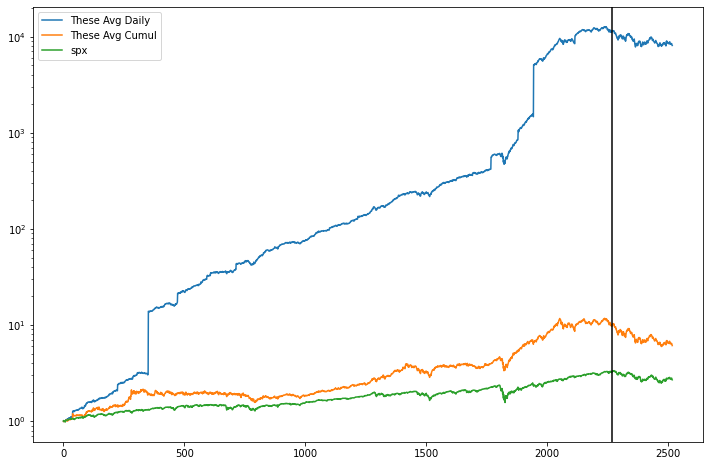

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-12-17,NaN,NaN
1,2012-12-18,0.995055,0.995055
2,2012-12-19,1.005289,1.004353
3,2012-12-20,0.999467,0.999649
4,2012-12-21,1.000545,0.995730


In [10]:
out.tail()

,Date,mine1,mine2
2514,2022-12-12,8416.684872,6.411308
2515,2022-12-13,8460.340179,6.454566
2516,2022-12-14,8405.817958,6.402768
2517,2022-12-15,8157.240962,6.222560
2518,2022-12-16,8080.469551,6.117995


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

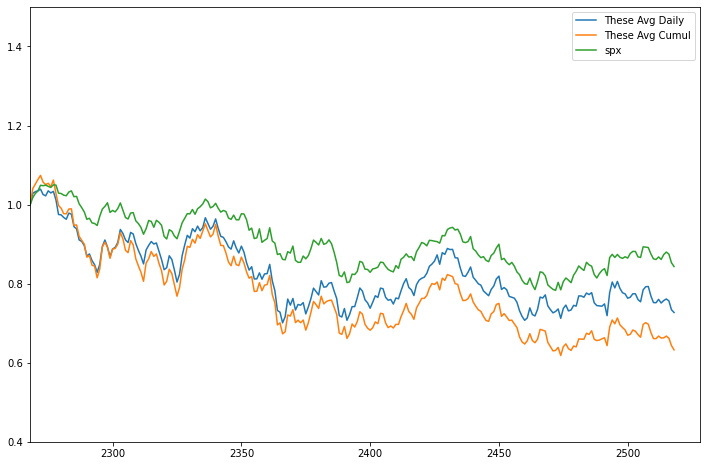

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2459,53.810001,53.810001,53.860001,52.380001,52.730000,3.985459,1.020482,0.978720,0.959076
2460,53.970001,53.970001,55.200001,53.290001,53.290001,3.988428,1.012760,1.002973,0.990336
2461,54.599998,54.599998,57.200001,53.950001,55.110001,4.000034,0.990746,1.011673,1.021123
2462,55.750000,55.750000,55.810001,53.000000,53.264999,4.020877,1.046654,1.021062,0.975549
2463,53.630001,53.630001,55.200001,53.009998,54.310001,3.982109,0.987479,0.961973,0.974170


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2459,53.810001,53.810001,53.860001,52.380001
2460,53.970001,53.970001,55.200001,53.290001
2461,54.599998,54.599998,57.200001,53.950001
2462,55.750000,55.750000,55.810001,53.000000
2463,53.630001,53.630001,55.200001,53.009998


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2459,53.810001,53.810001,53.860001,52.380001,55.200001,53.290001,1.025832,0.990336
2460,53.970001,53.970001,55.200001,53.290001,57.200001,53.950001,1.059848,0.999629
2461,54.599998,54.599998,57.200001,53.950001,55.810001,53.000000,1.022161,0.970696
2462,55.750000,55.750000,55.810001,53.000000,55.200001,53.009998,0.990135,0.950852
2463,53.630001,53.630001,55.200001,53.009998,56.740002,53.529999,1.057990,0.998135


0.05    0.977712
Name: HighMult, dtype: float64


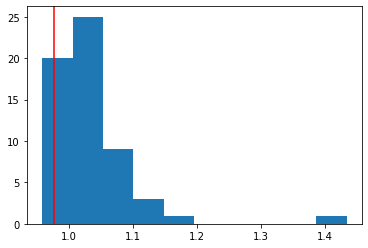

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0317056125738366


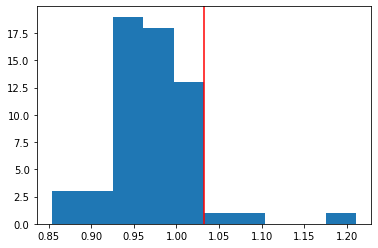

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0317056125738366, 0.9777122957569568)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0128013800734783, 0.9854154442272787)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2459,53.810001,53.810001,53.860001,52.380001,55.200001,53.290001,1.025832,0.990336,0
2460,53.970001,53.970001,55.200001,53.290001,57.200001,53.950001,1.059848,0.999629,1
2461,54.599998,54.599998,57.200001,53.950001,55.810001,53.000000,1.022161,0.970696,1
2462,55.750000,55.750000,55.810001,53.000000,55.200001,53.009998,0.990135,0.950852,1
2463,53.630001,53.630001,55.200001,53.009998,56.740002,53.529999,1.057990,0.998135,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0082195023097678, 0.9835704410295821, 1.075123242187245, 0.9767286937057889)

In [27]:
get_hilo_mults(aapl)

(1.0011411627437827,
 0.9901630242668259,
 1.0131345248915862,
 0.9843335321959812)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=[
        'stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
        'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.001141,0.990163,1.013135,0.984334
1,ABMD,1.002018,0.997318,1.033213,1.000348
2,ABNB,1.015052,0.988077,1.011595,0.981273
3,ABST,1.007003,0.996459,1.000530,0.995890
4,ACN,1.002499,0.990295,1.017983,0.990341


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,134.509995,AAPL
ABMD,381.0,ABMD
ABNB,89.57,ABNB
ABST,9.97,ABST
ACN,264.480011,ACN
...,...,...
ZM,69.860001,ZM
ZYXI,13.32,ZYXI
^GSPC,3852.360107,^GSPC
^IXIC,10705.414062,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.001141,0.990163,1.013135,0.984334,134.509995
1,ABMD,1.002018,0.997318,1.033213,1.000348,381.0
2,ABNB,1.015052,0.988077,1.011595,0.981273,89.57
3,ABST,1.007003,0.996459,1.000530,0.995890,9.97
4,ACN,1.002499,0.990295,1.017983,0.990341,264.480011


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv